<a href="https://colab.research.google.com/github/HARDIK-IS-SHARMA/Retail-store-Sales-Prediction-using-Machine-learning-Regression-/blob/main/Big-mart-Analysis-Using-Machine_learning-(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

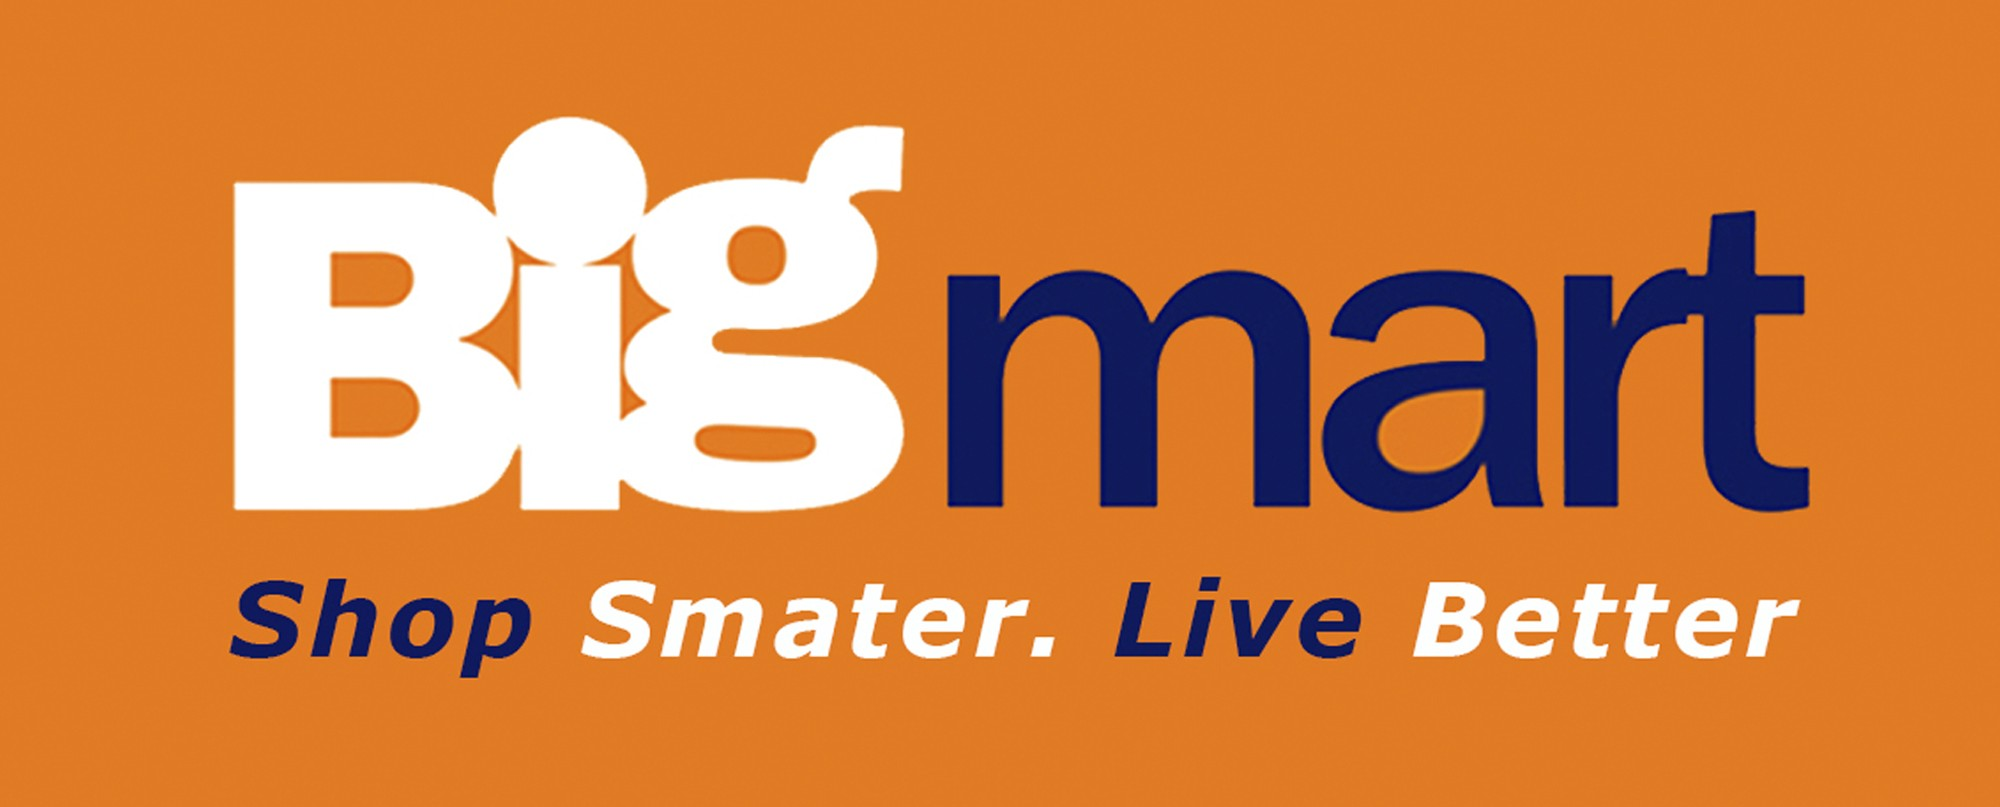

# **Problem Statement & Solution** #

### **The objective of this project is to predict the sales of various products using Big Mart sales data to determine which product will have the highest sales potential. By accurately forecasting sales, the aim is to provide actionable insights that will help the business prioritize products and develop strategies to maximize revenue and growth. This will be achieved using supervised machine learning regression algorithms to analyze historical sales data and predict future trends. The ultimate goal is to support the business in making data-driven decisions that enhance product performance and business growth.** ###

## Importing the Necessary libraries ##

In [ ]:
#Importing all the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #DAta visualisation libraries
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


## Data Collection and Data Preprosessing ##

In [ ]:
# Loading the Dataset (I have taken the dataset from Kaggle to perform the prediction)
df = pd.read_csv(r"/content/Train.csv")

In [ ]:
#Taking The first look of the dataset
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Understanding what each columns represent ##

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## **Description of Each Column** ##

Item_Identifier: Unique identifier for each product.

Item_Weight: Weight of the product in kilograms.

Item_Fat_Content: Categorization of the product based on fat content (e.g., Low Fat, Regular).

Item_Visibility: The percentage of total display area allocated to this particular product.

Item_Type: The category to which the product belongs (e.g., Dairy, Soft Drinks, Meat).

Item_MRP: Maximum Retail Price (MRP) of the product.

Outlet_Identifier: Unique identifier for each store or outlet.

Outlet_Establishment_Year: The year when the outlet was established.

Outlet_Size: The size of the outlet (e.g., Small, Medium, High).

Outlet_Location_Type: The type of area where the outlet is located (e.g., Tier 1, Tier 2, Tier 3).

Outlet_Type: The category of the outlet (e.g., Grocery Store, Supermarket Type1).

Item_Outlet_Sales: Sales of the product in the particular outlet

In [ ]:
# Seeing the shape of the data
df.shape

(8523, 12)

In [ ]:
#Getting info of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# Knowing which is categorical or which is numerical columns in the dataset

Cat_col = [col for col in df.columns if df[col].dtype == "object" ]
num_col = [col for col in df.columns if df[col].dtype in ["int","float64"]]

print("Categorical column-", Cat_col)
print("Numerical Column ", num_col)

Categorical column- ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numerical Column  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [ ]:
#Checking the missing value
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


- There are **1463** missing value in **Item_Weight**
- There are **2410** missing value in the **Outlet_size**

In [ ]:
#HAndling the missing value
# 1st imputing the mean value in the Item_weight (as its a numerical coloumn)
# 2nd imputing the mode of Outlet_size in place of the misssing value
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace = True )
df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]))

In [ ]:
#Checking it again
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Performing EDA ##

In [ ]:
# First lets see all the statical values of the numerical column data through Describe fumction
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


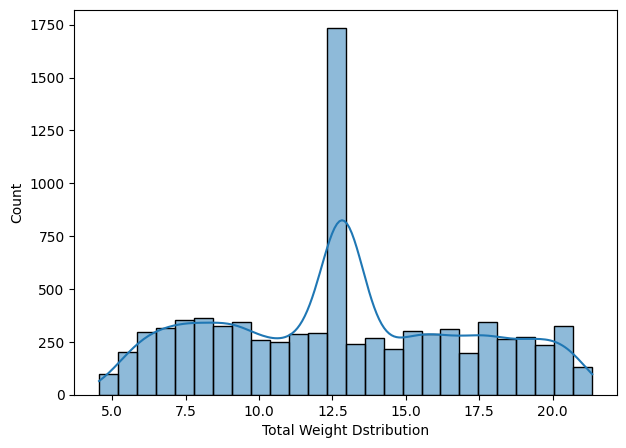

In [ ]:
#Checking how the item_weight is distributed :
plt.figure(figsize=(7,5))
sns.histplot(df['Item_Weight'],kde =True)
plt.xlabel("Total Weight Dstribution")
plt.show()

- We can see the average weight of maximum item is around 12.5 kg

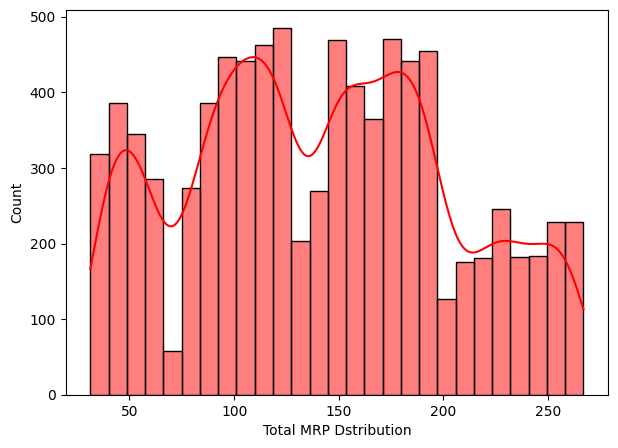

In [ ]:
#Checking how the item_Fat_content  is distributed :
plt.figure(figsize=(7,5))
sns.histplot(df['Item_MRP'],color="red",kde = True)
plt.xlabel("Total MRP Dstribution")
plt.show()


- WE Can see that Maximum Price range in the store is ranging from 50 to 280 $

<ipython-input-14-432b2fa7a791>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df , x = "Outlet_Establishment_Year",palette='dark')


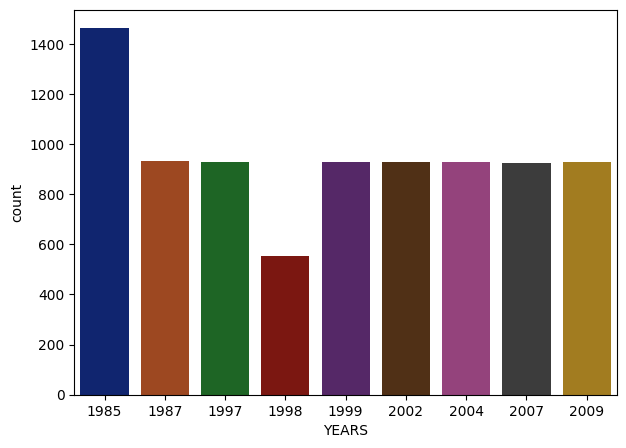

In [ ]:
#Checking how the Outlet_stablistment_year  is distributed :
plt.figure(figsize=(7,5))
sns.countplot(data = df , x = "Outlet_Establishment_Year",palette='dark')
plt.xlabel("YEARS")
plt.show()


- We can see From the above Graph that in starting year of 1985 it open around 1500 store (Of all sizes , small , big) while from 1999 onwards the store opening is arround 900 in every 2 years  

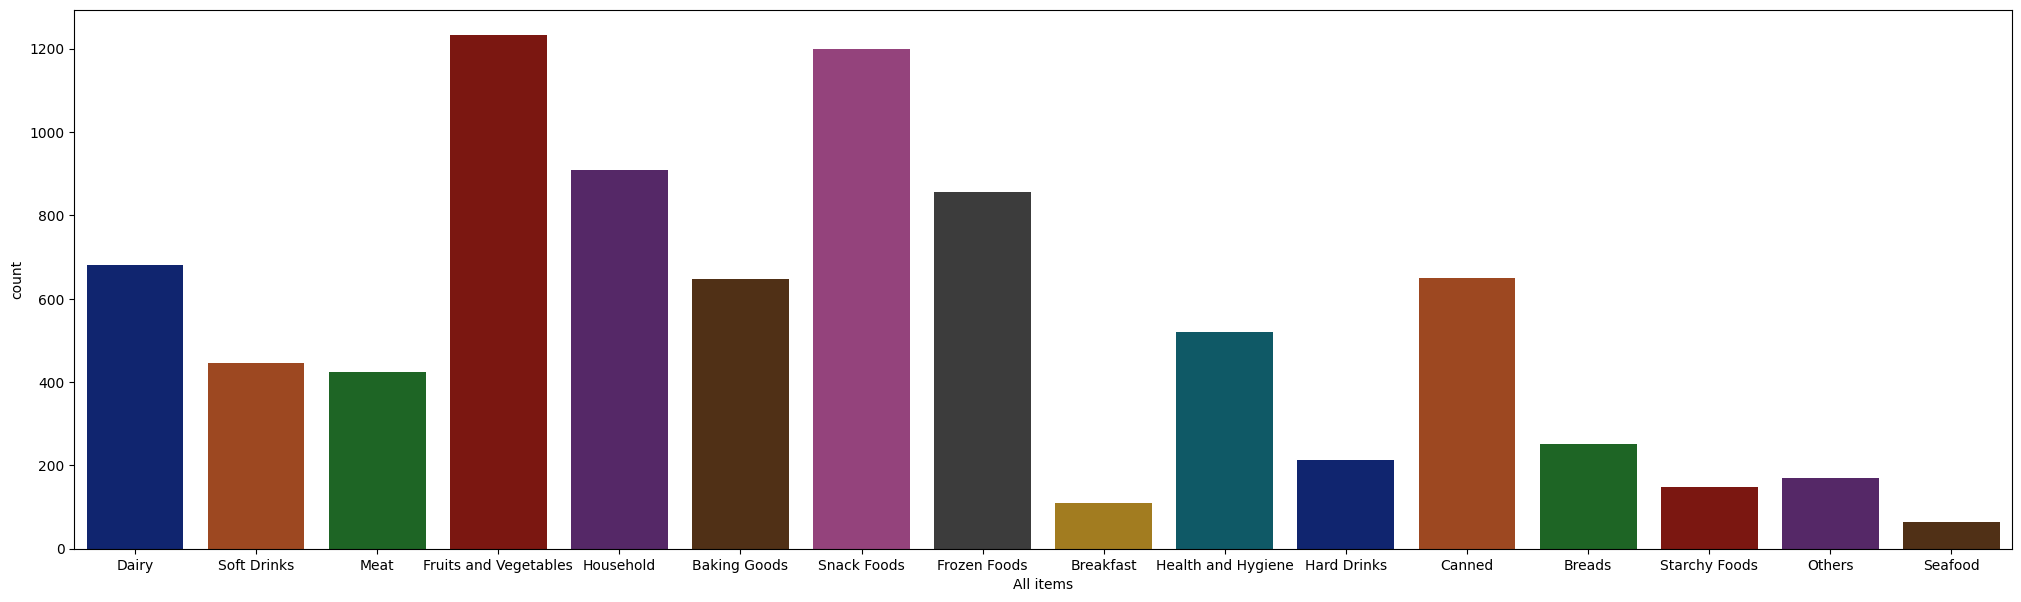

In [ ]:
#Checking how the Item_Type  is distributed :
plt.figure(figsize=(25,7))
sns.countplot(data = df , x = "Item_Type",hue = 'Item_Type',palette='dark')
plt.xlabel("All items")
plt.show()


- From the Above graph We can see that the count > 900 is of 4 column which is
- Fruits And Vegetable
- Household
- Snack Foods
- Frozen Foods

- While Seafood is having the least amount present in the stores

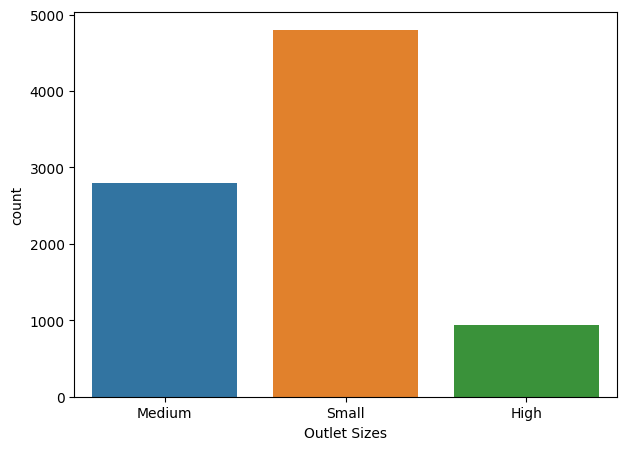

In [ ]:
#Checking how the Outlet_Size  is distributed :
plt.figure(figsize=(7,5))
sns.countplot(data = df , x = "Outlet_Size",hue = 'Outlet_Size')
plt.xlabel("Outlet Sizes")
plt.show()


- The Small Store is high in number as it is around 5k , while medium Store count is around 3k , and High store count is around 1k

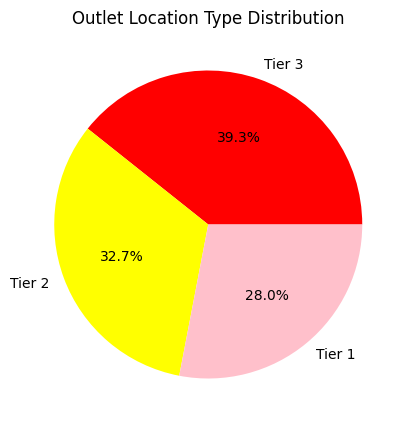

In [ ]:
#Checking how the Outlet_Location_Type is distributed :
# Get the counts for each location type
location_counts = df['Outlet_Location_Type'].value_counts()

# Pie chart
plt.figure(figsize=(7, 5))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%',colors=["r","yellow","pink"])
plt.title("Outlet Location Type Distribution")
plt.show()

- WE Can see that Tier 3 location takes around 40% of the total store
- Tier 2 around 33%
- Tier 1 arounf 28%

<ipython-input-19-0dda9a71dfba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = temp , x = "Outlet_Location_Type",y = 'Item_Outlet_Sales',palette='viridis')


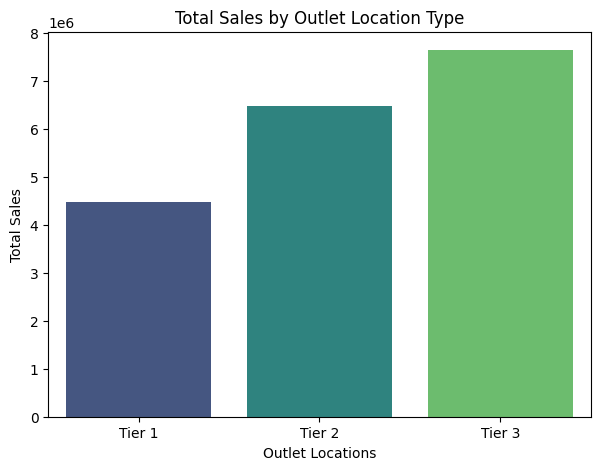

In [ ]:
temp = pd.DataFrame(df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum())
#Checking how the Total Sales is distributed based on there location type :
plt.figure(figsize=(7,5))
sns.barplot(data = temp , x = "Outlet_Location_Type",y = 'Item_Outlet_Sales',palette='viridis')
plt.xlabel("Outlet Locations")
plt.ylabel("Total Sales")
plt.title("Total Sales by Outlet Location Type")
plt.show()

- Tier 3 > Tier 2 > Tier 1 Outlet in Comparison to total sales

In [ ]:
#Before moving on to the visualisation first lets preprocess the Item_fat_Content Data
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

- As We can see LF And low fat Comes under Low Fat Categgory And reg conmes under Regular Categories

In [ ]:
df.replace({'Item_Fat_Content' : {"LF" : "Low Fat", "low fat" : "Low Fat", "reg" : "Regular"}}, inplace = True)

In [ ]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

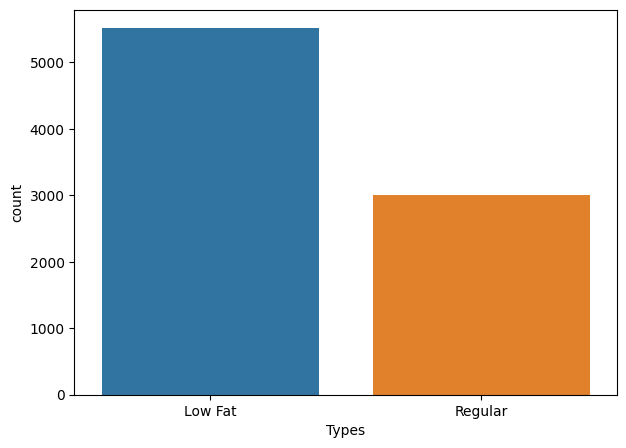

In [ ]:
# Now Lets Visualise it with Countplot
plt.figure(figsize=(7,5))
sns.countplot(data = df , x = "Item_Fat_Content",hue = 'Item_Fat_Content')
plt.xlabel("Types")
plt.show()



## **Label Encoding** ##

- Now We gonna label all the categorical column in the numrical value with the help of Label encoder so we can do our further prediction analysis with the help of Xgboost algorithm

In [ ]:
encoder = LabelEncoder()

In [ ]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [ ]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


## Spliting Features And Target ##

In [ ]:
X = df.iloc[:,:-1]
Y = df['Item_Outlet_Sales']


In [ ]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [ ]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


## Spliting the Data into Training Data And Testing Data ##

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 42)

In [ ]:
print(X.shape, X_train.shape , X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


## Training Machine Learning Model ##

## Evaluation ##

## Testing multiple Regreson model , and taking that in consideration which have the highest R2 score among them ##

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_squared_error
import xgboost as xgb

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regression': SVR() ,
    'XGBoost': xgb.XGBRegressor(random_state=42)}

# Define the scoring metric
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Split the data
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate each model using cross-validation
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)
    results[name] = {
        'Cross-Validation MSE': -cv_scores.mean(),
        'Cross-Validation Std': cv_scores.std()
    }

# Train and evaluate on the test set
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name]['Test MSE'] = mse
    results[name]['Test R-squared'] = r2

# Display the results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"  Cross-Validation MSE: {metrics['Cross-Validation MSE']:.2f} (+/- {metrics['Cross-Validation Std']:.2f})")
    print(f"  Test MSE: {metrics['Test MSE']:.2f}")
    print(f"  Test R-squared: {metrics['Test R-squared']:.2f}")
    print()


Model: Linear Regression
  Cross-Validation MSE: 1486811.27 (+/- 28519.30)
  Test MSE: 1304191.46
  Test R-squared: 0.52

Model: Random Forest
  Cross-Validation MSE: 1312411.82 (+/- 23769.70)
  Test MSE: 1200727.88
  Test R-squared: 0.56

Model: Gradient Boosting
  Cross-Validation MSE: 1199744.12 (+/- 28105.09)
  Test MSE: 1072949.08
  Test R-squared: 0.61

Model: Support Vector Regression
  Cross-Validation MSE: 3107397.88 (+/- 87604.56)
  Test MSE: 2791363.48
  Test R-squared: -0.03

Model: XGBoost
  Cross-Validation MSE: 1471330.77 (+/- 35773.22)
  Test MSE: 1291383.49
  Test R-squared: 0.52



## Going With the Gradient Boosting Algorithm As it giving Better R2 Score ##

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the model
model = GradientBoostingRegressor(random_state=42)

# Define the scoring metric
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Split the data
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scorer)
cv_mse = -cv_scores.mean()
cv_std = cv_scores.std()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model on the test set
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Gradient Boosting Regressor")
print(f"  Cross-Validation MSE: {cv_mse:.2f} (+/- {cv_std:.2f})")
print(f"  Test MSE: {test_mse:.2f}")
print(f"  Test R-squared: {test_r2:.2f}")


Gradient Boosting Regressor
  Cross-Validation MSE: 1199744.12 (+/- 28105.09)
  Test MSE: 1072949.08
  Test R-squared: 0.61
